In [17]:
%matplotlib inline
import scipy.special as sp
import numpy as np
import matplotlib.pyplot as plt


In [18]:
Lag=sp.genlaguerre(1,0)
Lag

poly1d([-1.,  1.])

In [19]:
Lag=np.zeros([6,2])
print(Lag)
i=0
for n in range(1,4):
    print(n)
    for l in range(0,n):
        print(l)
        Lag[i,0]=n-l-1
        Lag[i,1]=2*l+1
        i=i+1
Lag

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
1
0
2
0
1
3
0
1
2


array([[ 0.,  1.],
       [ 1.,  1.],
       [ 0.,  3.],
       [ 2.,  1.],
       [ 1.,  3.],
       [ 0.,  5.]])

In [20]:
Lag(6)*np.exp(-6/2.)

TypeError: 'numpy.ndarray' object is not callable

In [11]:
L_ord=[0,1,2]
Le[:]=sp.legendre(L_ord[:])

TypeError: '<' not supported between instances of 'list' and 'int'

In [22]:
Le(np.cos(0))

1.0

In [24]:
Lag(3)*Le(np.cos(.1))

-1.9404237353655263

In [50]:
#Attenuation fn
def att(dist, ang, c, alpha):
    #Radial part
    for i in range(0,4):
        for j in range(0,4):
            return c[i,j]*sp.legendre(i)(np.cos(ang))* \
                np.exp(-dist/(2*alpha))*sp.laguerre(Lag[j,0],Lag[j,1])(dist/alpha)*np.power(dist/alpha,Lag[j,1])
            

In [12]:
#Simple Attenuation fn
def att(dist, ang, b):
    # angular part
    angular=np.where(b[1]*np.abs(ang)<np.pi/2.,np.square(np.cos(b[1]*ang)),0.)
    #radial
    radial=np.exp(-np.square(dist/b[2]))
    return 1.0-b[0]*angular*radial

In [16]:
b=np.zeros(3)
b[0]=1
b[1]=10
b[2]=100
alpha=500
att(1,.02,b)

0.039565551245765218

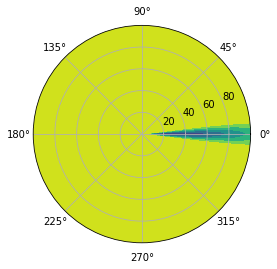

In [41]:
azimuths = np.radians(np.linspace(-180, 180, 360))
zeniths = np.arange(0, 100, .1)

r, theta = np.meshgrid(zeniths, azimuths)
values = att(r,theta,b)

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, r, values)

plt.show()


In [ ]:
coords_in = np.loadtxt('coords.txt')

In [22]:
#Total att
def deviation(c,alpha):
    total_att=np.ones(nturb,nang)
    deviation=0
    for k in range(0,nangles):
        for j in range(0,nturb):
            for i in range(0,nturb):
                total_att[j,k] = total_att[j,k]*att(...)
            deviation=deviation+np.square(vref[j,k]-v0*total_att[j,k])
    return deviation
deviation

<function __main__.deviation>

In [23]:
minimize(deviation(c,alpha))

NameError: name 'minimize' is not defined